## Import libraries

In [15]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import splitfolders as spfd
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D,Input,Dense,Conv2D,Add,SeparableConv2D,ReLU,BatchNormalization,MaxPool2D,GlobalAvgPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

from tqdm import tqdm

## Google Colab
Jalankan cell ini jika menggunakan google colab

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

## Dataset

In [98]:
dataset = os.path.join('D:/Latihan/Dataset')

## Exploratory Data Analysis & Data preparation

Menunjukkan Jumlah Image tiap Kelas

In [10]:
list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(dataset):
    list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

In [11]:
index = np.arange(1,6,1)
d = {'Class': os.listdir(dataset), 'Total_image_in_class': np.delete(list, [0])}
data1 = pd.DataFrame(data=d, index=index)
data1

,Class,Total_image_in_class
1,Acne,778
2,Cancer,560
3,Milia,102
4,Rosacea,342
5,temp,311


Menunjukkan persebaran data tiap kelas melalui bar plot

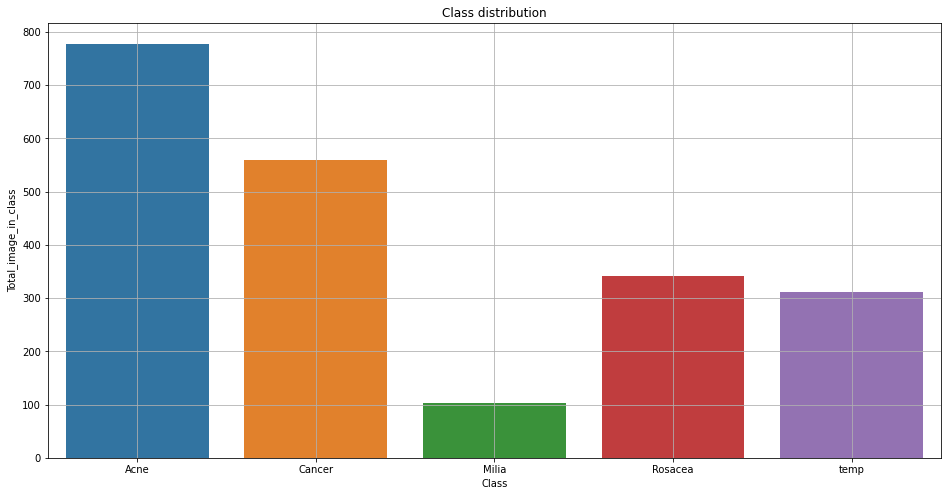

In [12]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=data1,x='Class', y='Total_image_in_class')
plt.title('Class distribution')
ax.grid()
plt.show()

In [13]:
print("Jumlah kelas dalam dataset adalah {}".format(len(data1)))
print("Jumlah total gambar dalam dataset adalah {}".format(sum(data1['Total_image_in_class'])))

Jumlah kelas dalam dataset adalah 5
Jumlah total gambar dalam dataset adalah 2093


Melakukan EDA lebih dalam lagi

In [18]:
filenames = []
folder = []
image = []
shape = []
x = []
y = []

for path, subdirs, files in tqdm(os.walk(dataset)):
    for name in files:
        filenames += [os.path.join(path, name)]
        folder += [os.path.basename(os.path.dirname(filenames[-1]))]
        image += [os.path.basename(filenames[-1])]
        
for i in range (len(filenames)) :
    shape += [cv2.imread(filenames[i]).shape[0:2]]

for i in range (len(filenames)) :
    x += [shape[i][0]]
    y += [shape[i][1]]
    
data2 = pd.DataFrame({'Image path':filenames, 'Class':folder, 'Name_Image':image})

6it [00:00, 222.19it/s]


In [19]:
extension = []
for i in range (sum(data1['Total_image_in_class'])) :
    strValue = data2['Name_Image'][i]
    ch = '.'
    newCh = strValue[strValue.find(ch):]
    extension.append(newCh)

In [31]:
data2['Extension'] = extension
data2['Shape(x,y)'] = shape
data2['x'] = x
data2['y'] = y
data2

,Image path,Class,Name_Image,Extension,"Shape(x,y)",x,y
0,D:/Latihan/Dataset\Acne\0.jpg,Acne,0.jpg,.jpg,"(400, 400)",400,400
1,D:/Latihan/Dataset\Acne\008907VB.jpg,Acne,008907VB.jpg,.jpg,"(430, 260)",430,260
2,D:/Latihan/Dataset\Acne\008911VB.jpg,Acne,008911VB.jpg,.jpg,"(430, 260)",430,260
3,D:/Latihan/Dataset\Acne\008938HB.jpg,Acne,008938HB.jpg,.jpg,"(1181, 1640)",1181,1640
4,D:/Latihan/Dataset\Acne\032200VB.jpg,Acne,032200VB.jpg,.jpg,"(448, 260)",448,260
...,...,...,...,...,...,...,...
2088,D:/Latihan/Dataset\temp\perioral-dermatitis-96...,temp,perioral-dermatitis-96.jpg,.jpg,"(470, 720)",470,720
2089,D:/Latihan/Dataset\temp\perioral-dermatitis-97...,temp,perioral-dermatitis-97.jpg,.jpg,"(495, 720)",495,720
2090,D:/Latihan/Dataset\temp\perioral-dermatitis-98...,temp,perioral-dermatitis-98.jpg,.jpg,"(465, 720)",465,720
2091,D:/Latihan/Dataset\temp\perioral-dermatitis-99...,temp,perioral-dermatitis-99.jpg,.jpg,"(472, 720)",472,720


Dataframe diatas akan kita lakukan sort terhadap kolom x dan y

In [32]:
data2.sort_values(by=['x','y'])

,Image path,Class,Name_Image,Extension,"Shape(x,y)",x,y
991,D:/Latihan/Dataset\Cancer\download (4).jpg,Cancer,download (4).jpg,.jpg,"(35, 31)",35,31
1084,D:/Latihan/Dataset\Cancer\images (9).jpg,Cancer,images (9).jpg,.jpg,"(42, 44)",42,44
1083,D:/Latihan/Dataset\Cancer\images (8)3.jpg,Cancer,images (8)3.jpg,.jpg,"(44, 38)",44,38
1080,D:/Latihan/Dataset\Cancer\images (8).jpg,Cancer,images (8).jpg,.jpg,"(44, 52)",44,52
1081,D:/Latihan/Dataset\Cancer\images (8)1.jpg,Cancer,images (8)1.jpg,.jpg,"(50, 45)",50,45
...,...,...,...,...,...,...,...
1361,D:/Latihan/Dataset\Milia\m3.jpg,Milia,m3.jpg,.jpg,"(2231, 2974)",2231,2974
1552,D:/Latihan/Dataset\Rosacea\r51.jpg,Rosacea,r51.jpg,.jpg,"(2379, 2751)",2379,2751
1924,D:/Latihan/Dataset\temp\d56.jpg,temp,d56.jpg,.jpg,"(2448, 3024)",2448,3024
1911,D:/Latihan/Dataset\temp\d44.jpg,temp,d44.jpg,.jpg,"(3088, 2320)",3088,2320


In [33]:
print("Ukuran gambar dalam dataset memiliki nilai minimum untuk (x,y) yaitu x={} dan y{}".format(min(x),min(y)))

Ukuran gambar dalam dataset memiliki nilai minimum untuk (x,y) yaitu x=35 dan y31


Kita buang gambar dalam dataset yang ukurannya kurang dari (180,180)

In [88]:
df_filtered = data2[(data2['x'] >= 180) & (data2['y'] >= 180)]
df_filtered

,Image path,Class,Name_Image,Extension,"Shape(x,y)",x,y
0,D:/Latihan/Dataset\Acne\0.jpg,Acne,0.jpg,.jpg,"(400, 400)",400,400
1,D:/Latihan/Dataset\Acne\008907VB.jpg,Acne,008907VB.jpg,.jpg,"(430, 260)",430,260
2,D:/Latihan/Dataset\Acne\008911VB.jpg,Acne,008911VB.jpg,.jpg,"(430, 260)",430,260
3,D:/Latihan/Dataset\Acne\008938HB.jpg,Acne,008938HB.jpg,.jpg,"(1181, 1640)",1181,1640
4,D:/Latihan/Dataset\Acne\032200VB.jpg,Acne,032200VB.jpg,.jpg,"(448, 260)",448,260
...,...,...,...,...,...,...,...
2088,D:/Latihan/Dataset\temp\perioral-dermatitis-96...,temp,perioral-dermatitis-96.jpg,.jpg,"(470, 720)",470,720
2089,D:/Latihan/Dataset\temp\perioral-dermatitis-97...,temp,perioral-dermatitis-97.jpg,.jpg,"(495, 720)",495,720
2090,D:/Latihan/Dataset\temp\perioral-dermatitis-98...,temp,perioral-dermatitis-98.jpg,.jpg,"(465, 720)",465,720
2091,D:/Latihan/Dataset\temp\perioral-dermatitis-99...,temp,perioral-dermatitis-99.jpg,.jpg,"(472, 720)",472,720


In [253]:
allfiles = data2['Image path'].tolist()
to_be_kept = df_filtered['Image path'].tolist()
to_be_deleted = [item for item in allfiles if item not in to_be_kept]

new_ip = []
for i in range(len(to_be_deleted)) :
    new = to_be_deleted[i].replace("\\", "/")
    new_ip.append(new)

for i in range(len(new_ip)) :
    os.remove(new_ip[i])

Melihat kembali persebaran dataset kita

In [254]:
list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(dataset):
    list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

In [255]:
index = np.arange(1,6,1)
d = {'Class': os.listdir(dataset), 'Total_image_in_class': np.delete(list, [0])}
data3 = pd.DataFrame(data=d, index=index)
data3

,Class,Total_image_in_class
1,Acne,742
2,Cancer,512
3,Milia,95
4,Rosacea,287
5,temp,307


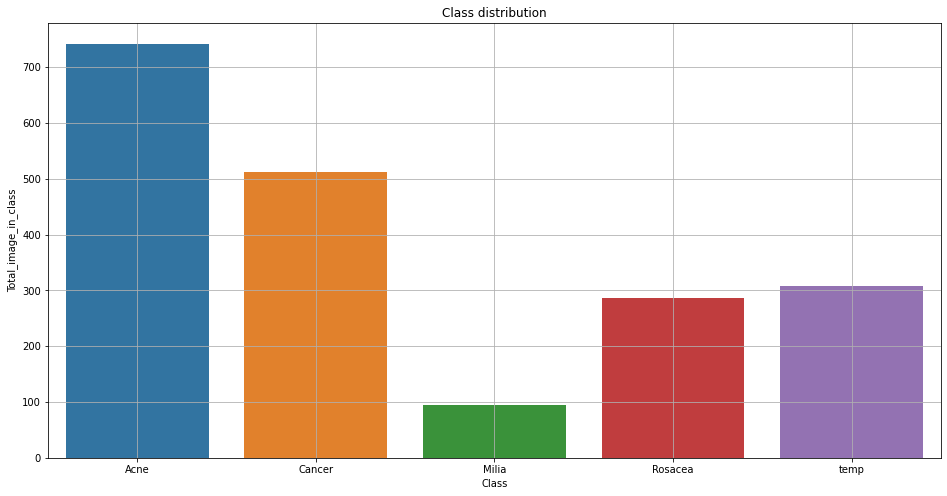

In [256]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=data3,x='Class', y='Total_image_in_class')
plt.title('Class distribution')
ax.grid()
plt.show()

In [262]:
print("Jumlah kelas dalam dataset adalah {}".format(len(data3)))
print("Jumlah total gambar dalam dataset adalah {}".format(sum(data3['Total_image_in_class'])))

Jumlah kelas dalam dataset adalah 5
Jumlah total gambar dalam dataset adalah 1943


Persebaran data dari tiap kelas kurang merata

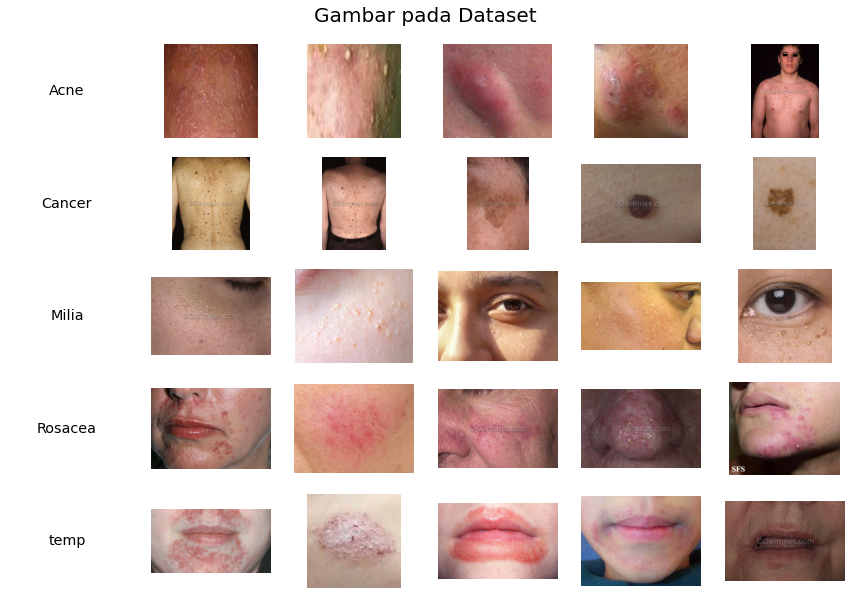

In [273]:
unique_list = []
unique = df_filtered.groupby('Class').apply(lambda df: df.sample(5))['Class'].unique()
fig = plt.figure(figsize=(15, 10))
plt.title('Gambar pada Dataset', fontsize=20, y=1.03)
plt.axis('off')
columns = 6
rows = 5
img2show = df_filtered.groupby('Class').apply(lambda df: df.sample(6))
for i in range(1, columns*rows +1):
    if i % columns == 1 :
        unique_list.append(i)
        fig.add_subplot(rows, columns, i)
        plt.text(0.5,0.5, unique[len(unique_list)-1], ha='center', va='center', fontsize='x-large', fontweight='normal')
        plt.axis('off')
    else :
        fig.add_subplot(rows, columns, i)
        img = mpimg.imread(img2show.iloc[i-1]['Image path'])
        #kelas = img2show.iloc[i-1]['Class']
        imgplot = plt.imshow(img)
        plt.axis('off')
        #plt.title(f'{kelas}')
plt.show()

## Data Splitting

In [275]:
output = "D:/Latihan/Output"
spfd.ratio(dataset, output=output, seed=2022, ratio=(0.8, 0.2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 170 files [00:00, 1699.44 files/s]
Copying files: 387 files [00:00, 1968.63 files/s]
Copying files: 598 files [00:00, 2032.84 files/s]
Copying files: 802 files [00:00, 1950.87 files/s]
Copying files: 1005 files [00:00, 1978.44 files/s]
Copying files: 1208 files [00:00, 1991.34 files/s]
Copying files: 1408 files [00:00, 1937.76 files/s]
Copying files: 1613 files [00:00, 1968.73 files/s]
Copying files: 1943 files [00:00, 1968.27 files/s]


In [276]:
train_dir = "D:/Latihan/Output/train"
validation_dir = "D:/Latihan/Output/val"

In [277]:
#################
# Training File #
#################
train_list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(train_dir):
    train_list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

###################
# Validation File #
###################
validation_list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(validation_dir):
    validation_list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

In [279]:
index = np.arange(1,6,1)
d = {'Class': os.listdir(dataset), 'Image_in_training': np.delete(train_list, [0]),
    'Image_in_validation': np.delete(validation_list, [0])
    }
data4 = pd.DataFrame(data=d, index=index)
data4

,Class,Image_in_training,Image_in_validation
1,Acne,593,149
2,Cancer,409,103
3,Milia,76,19
4,Rosacea,229,58
5,temp,245,62


In [294]:
training_len = data4['Image_in_training'].sum()
validation_len = data4['Image_in_validation'].sum()

## Modelling

In [280]:
img_size = 180

train_datagen = ImageDataGenerator(rotation_range=10,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   rescale=1.0/255.,
                                   brightness_range=[0.4,1.5],
                                   width_shift_range=0.1,
                                   height_shift_range=0.1) 
    
validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_size,img_size),
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    seed=2022)

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                              target_size=(img_size, img_size),
                                                              class_mode='categorical',
                                                              batch_size=16,
                                                              seed=2022)

Found 1552 images belonging to 5 classes.
Found 391 images belonging to 5 classes.


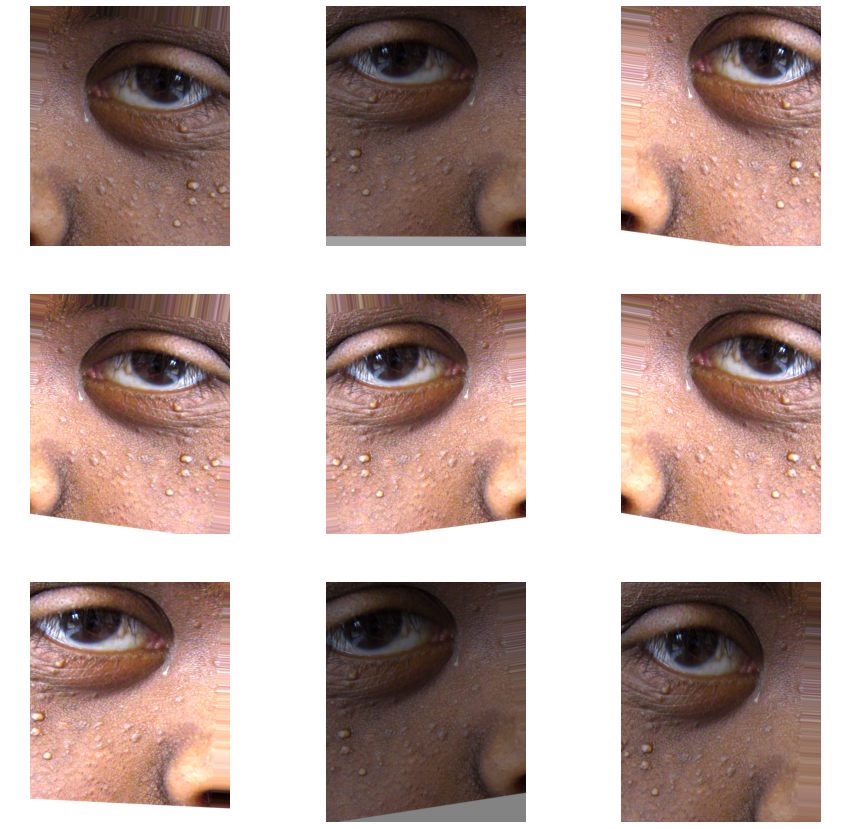

In [283]:
# Example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# load the image
img = load_img("D:/Latihan/Output/train/Milia/m35.jpg")
# Convert to numpy array
data = img_to_array(img)
# Expand dimension to one sample
samples = expand_dims(data, 0)
# Create image data augmentation generator
datagen = ImageDataGenerator(            rotation_range=10,
                                         zoom_range=0.1,
                                         horizontal_flip=True,
                                         brightness_range=[0.5,1.4],
                                         width_shift_range=0.1, 
                                         height_shift_range=0.1,
                             )
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot


fig = plt.figure(figsize=(15, 15))
plt.axis('off')
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    batch = it.next()

    image = batch[0].astype('uint8')

    fig.add_subplot(rows, columns, i)
    imgplot = plt.imshow(image)
    
    plt.axis('off')
plt.show()

In [284]:
def get_callbacks(model_name: str):
    """
    Parameters
    ----------
    model_name : str
        Nama model yang digunakan.

    Return
    -------
        list keras callbacks [checkpoint, LearningRateScheduler]
    """

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(model_name + "-weights-improvement-{epoch:04d}-{accuracy:.5f}.hdf5",
                                                                   monitor="accuracy",
                                                                   verbose=1,
                                                                   save_best_only=True,  
                                                                   mode="max")  
    
    def scheduler(epoch, lr):
      if epoch <= 60:
        return lr 
      else:
        return lr * tf.math.exp(-0.1)

    
    return [model_checkpoint_callback,  keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]

In [306]:
from tensorflow.keras.applications.vgg19 import VGG19

pretrained_model= VGG19(include_top=False,
                        input_shape=(180,180,3),
                        pooling='avg',
                        weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

80150528/80134624 [==============================] - 60s 1us/step


In [317]:
model = Sequential([
    pretrained_model,
    Flatten(),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_23 (Dense)            (None, 64)                32832     
                                                                 
 dense_24 (Dense)            (None, 5)                 325       
                                                                 
Total params: 20,059,589
Trainable params: 34,181
Non-trainable params: 20,025,408
_____________________________________

In [318]:
callbacks = get_callbacks('classification')
model.compile(loss = 'categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(train_generator, 
                    epochs=100, 
                    validation_data = validation_generator,
                    steps_per_epoch = training_len // 32,
                    validation_steps = validation_len // 16)

Epoch 1/100
48/48 [==============================] - 23s 468ms/step - loss: 1.2366 - accuracy: 0.5257 - val_loss: 1.5790 - val_accuracy: 0.3802
Epoch 2/100
48/48 [==============================] - 22s 456ms/step - loss: 1.0423 - accuracy: 0.5961 - val_loss: 1.4390 - val_accuracy: 0.3802
Epoch 3/100
48/48 [==============================] - 23s 472ms/step - loss: 0.9502 - accuracy: 0.6434 - val_loss: 1.3658 - val_accuracy: 0.3906
Epoch 4/100
48/48 [==============================] - 23s 484ms/step - loss: 0.8950 - accuracy: 0.6664 - val_loss: 1.2157 - val_accuracy: 0.4661
Epoch 5/100
48/48 [==============================] - 23s 475ms/step - loss: 0.8496 - accuracy: 0.6803 - val_loss: 1.1306 - val_accuracy: 0.5911
Epoch 6/100
48/48 [==============================] - 23s 467ms/step - loss: 0.8111 - accuracy: 0.6868 - val_loss: 1.0504 - val_accuracy: 0.6146
Epoch 7/100
48/48 [==============================] - 23s 465ms/step - loss: 0.8017 - accuracy: 0.6967 - val_loss: 1.0003 - val_accuracy:

48/48 [==============================] - 24s 486ms/step - loss: 0.5351 - accuracy: 0.7954 - val_loss: 0.9431 - val_accuracy: 0.6979
Epoch 58/100
48/48 [==============================] - 23s 481ms/step - loss: 0.4930 - accuracy: 0.8072 - val_loss: 0.9502 - val_accuracy: 0.7005
Epoch 59/100
48/48 [==============================] - 23s 481ms/step - loss: 0.4956 - accuracy: 0.8000 - val_loss: 0.8924 - val_accuracy: 0.7005
Epoch 60/100
48/48 [==============================] - 23s 482ms/step - loss: 0.5201 - accuracy: 0.8007 - val_loss: 0.8759 - val_accuracy: 0.7083
Epoch 61/100
48/48 [==============================] - 23s 481ms/step - loss: 0.4689 - accuracy: 0.8237 - val_loss: 0.9592 - val_accuracy: 0.7005
Epoch 62/100
48/48 [==============================] - 23s 481ms/step - loss: 0.4808 - accuracy: 0.8171 - val_loss: 0.9531 - val_accuracy: 0.7214
Epoch 63/100
48/48 [==============================] - 23s 481ms/step - loss: 0.4810 - accuracy: 0.8217 - val_loss: 0.9847 - val_accuracy: 0.687

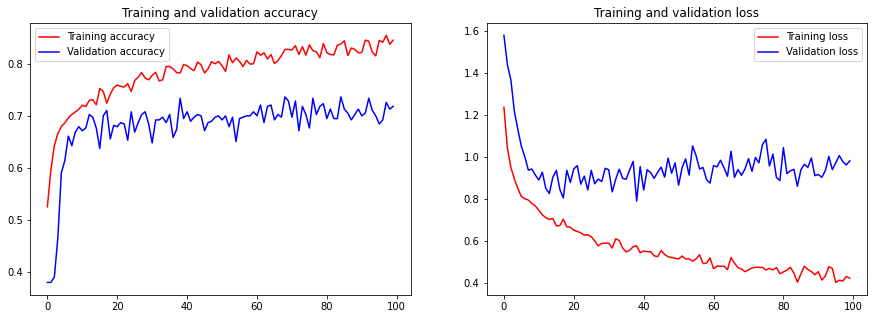

In [319]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()